# Importing DataSets; Cleaning & Preparing Data Handling Missing Values, Data Formatting, Binning;Summarizing the Data Frame Descriptive Statistics, Grouping, ANOVA, Correlation

##  Importing DataSets; Cleaning & Preparing Data Handling Missing Values, Data Formatting
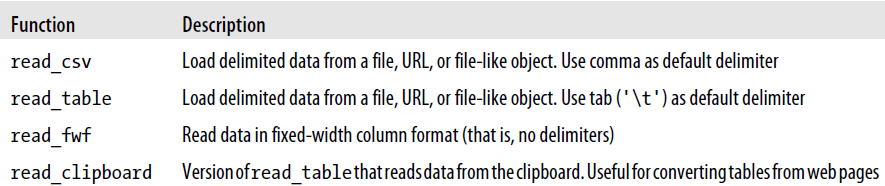

In [4]:
%%writefile ex1.csv
a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

Writing ex1.csv


In [11]:
import pandas as pd
df= pd.read_csv('ex1.csv')
#df.shape
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [10]:
## read table
df = pd.read_table('ex1.csv',sep=',')
#df = pd.read_table('ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [14]:
!type ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [17]:
%%writefile ex2.csv
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

Writing ex2.csv


In [20]:
## You can allow pandas to assign default column names, or you can specify names yourself:
pd.read_csv('ex2.csv',header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [25]:
pd.read_csv('ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [26]:
%%writefile ex4.csv
# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

Writing ex4.csv


In [28]:
!type ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [27]:
df = pd.read_csv('ex4.csv', skiprows=[0, 2, 3])
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [31]:
%%writefile ex5.csv
something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

Writing ex5.csv


In [32]:
result = pd.read_csv('ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [33]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [35]:
result = pd.read_csv('ex5.csv',na_values=['Null'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


### Different NA sentinels can be specified for each column in a dict:

In [39]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('ex5.csv', na_values=sentinels)


,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


## Writing Data Out to Text Format

In [40]:
data = pd.read_csv('ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [41]:
data.to_csv('out.csv')

In [42]:
!type out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [46]:
import sys
data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [47]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [48]:
#With no other options specified, both the row and column labels are written. Both of
#these can be disabled:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [51]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])
## cols to columns

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [60]:
xls_file = pd.ExcelFile(r'DataScienceWithPythonLecturerPlan.xlsx')
table = xls_file.parse('Sheet1')
table

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,Unit -I : Python Basics for Data Science,NaN,NaN
2,NaN,"Introduction to Python, Types, Expressions & V...",NaN,1.0
3,NaN,"String Operations, Lists & Tuples, Sets",NaN,1.0
4,NaN,"Dictionaries, Conditions & Branching, Loops,",NaN,1.0
5,NaN,"Functions, Objects & Classes",NaN,2.0
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,Unit-II: Working with Data in Python,NaN,NaN
9,NaN,"File Operations,",NaN,2.0
